In [ ]:

import numpy as np
import matplotlib.pyplot as plt
plt.clf()
plt.figure(dpi=600)
fig = plt.figure()
attn_vis = attn[0].to('cpu').detach().numpy().sum(axis=2)
plt.imshow(attn_vis)
plt.gca().set_aspect(0.2)
plt.colorbar()
plt.savefig('out/view_attn.pdf', bbox_inches='tight')

In [13]:
import torch
import numpy
from gnt.feature_network import ResUNet
feature_net = ResUNet(
            coarse_out_ch=32,
            fine_out_ch=32,
            single_net=True,
        ).to("cuda:1")
checkpoint = torch.load('./out/gnt_full/model_720000.pth')
feature_net.load_state_dict(checkpoint['feature_net'])


img = torch.from_numpy(numpy.load('out/gt_img.npy')).to("cuda:1")
out = feature_net(img.permute(2,0,1).unsqueeze(0))[0][0]
numpy.save("out/gt_feat.npy", out.to('cpu').detach().numpy())

In [51]:
import torch
import numpy as np
feat_2d = torch.from_numpy(np.load("out/feat_2d.npy")).to("cuda:1")
roi = feat_2d[::30, ::30, :32]

keys = out / out.norm(dim=0, keepdim=True)
queries = roi / roi.norm(dim=1, keepdim=True)
attn = queries @ keys.reshape(keys.shape[0], -1)
h, w = attn.shape[:2]
attn = attn.reshape(h, w, 192, 252).to('cpu').detach().numpy()


In [63]:

attn = attn > 0.5

(-0.5, 251.5, 191.5, -0.5)

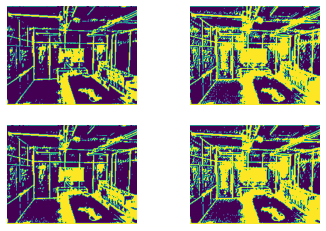

In [64]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(h,w)
for i, per_img_masks in enumerate(attn):
    for j, per_mask in enumerate(per_img_masks):
        a[i][j].set_axis_off()
        a[i][j].imshow(per_mask)
plt.axis("off")
# plt.savefig('out/feat_attn.pdf', bbox_inches='tight')

In [60]:
import torch
import numpy as np
feat_2d = torch.from_numpy(np.load("out/feat_2d.npy")).to("cuda:1")
roi = feat_2d[250:252, 190:192, 32:]

keys = out / out.norm(dim=0, keepdim=True)
queries = roi / roi.norm(dim=1, keepdim=True)
attn = queries @ keys.reshape(keys.shape[0], -1)
h, w = attn.shape[:2]
attn = attn.reshape(h, w, 192, 252).to('cpu').detach().numpy()


In [61]:
roi.shape

torch.Size([2, 2, 32])